In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
dataset['Fare'][dataset['Fare'].isnull()]

Series([], Name: Fare, dtype: float64)

<b>Analiza statystyczna cechy Fare</b>

Rozkład danych - histogram

In [3]:
dataset['Fare'].shape

(891,)

In [4]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


Rozkład danych prezentuje się następująco:

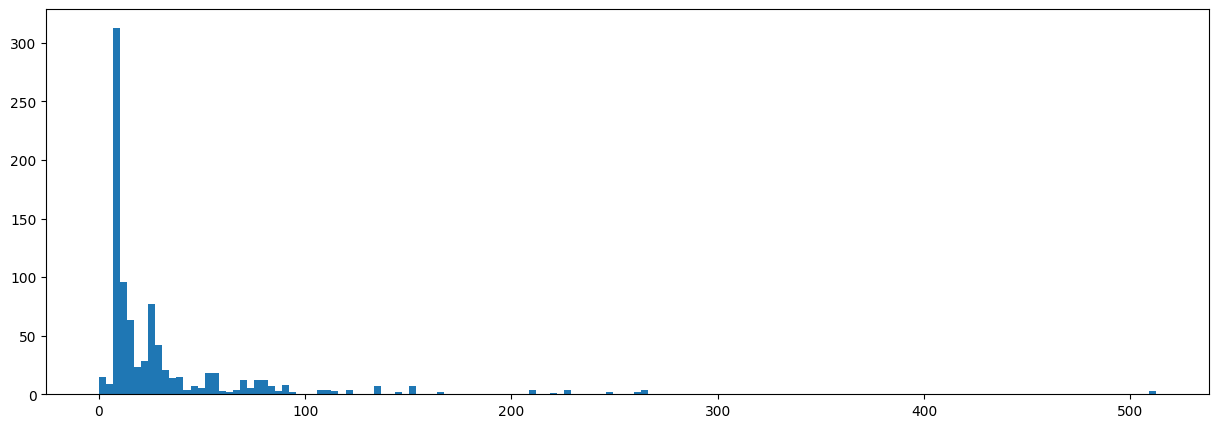

In [5]:
plt.figure(figsize=(15,5))
plt.hist(fare_values, bins=150)
plt.show()

Średnia

In [6]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


Średnia wynosi 32$.

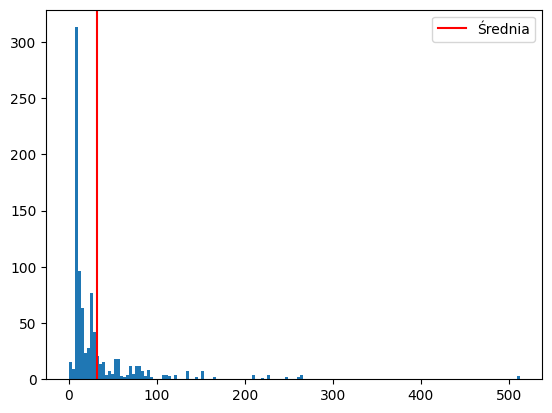

In [7]:
plt.hist(fare_values, bins=150)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.legend(loc='upper right')
plt.show()

Mediana

In [8]:
median_fare = round(np.median(fare_values),2)
print(median_fare)

14.45


Mediana wynosi 14.45$.

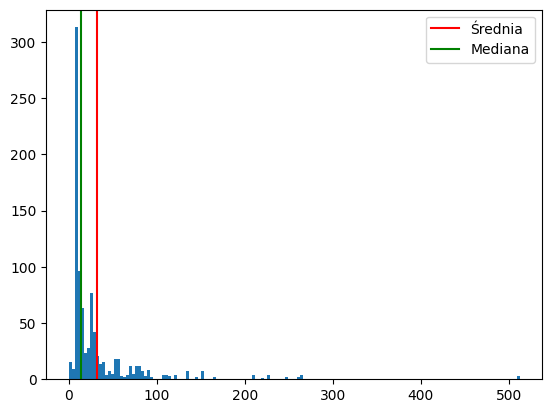

In [9]:
plt.hist(fare_values, bins=150)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.legend(loc='upper right')
plt.show()

Moda

In [10]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=8.05, count=43)


Moda wynosi 8.05$ i występuje w rozkładzie danych 43 razy.

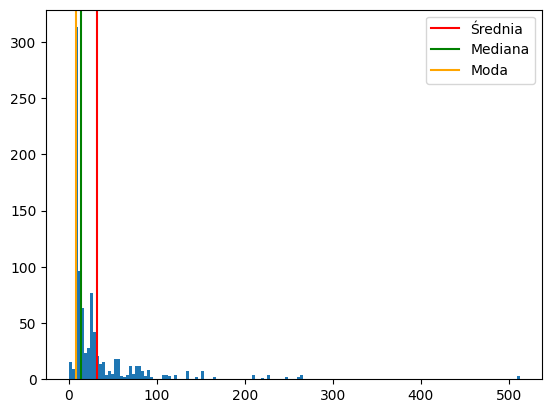

In [11]:
plt.hist(fare_values, bins=150)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.legend(loc='upper right')
plt.show()

Kwartyle

In [12]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.45
Q3: 31.0
Q4: 512.0


Patrząc na wyniki kwartyli możemy stwierdzić, że 50% wartości mieści sie pomiędzy 8 a 31$.

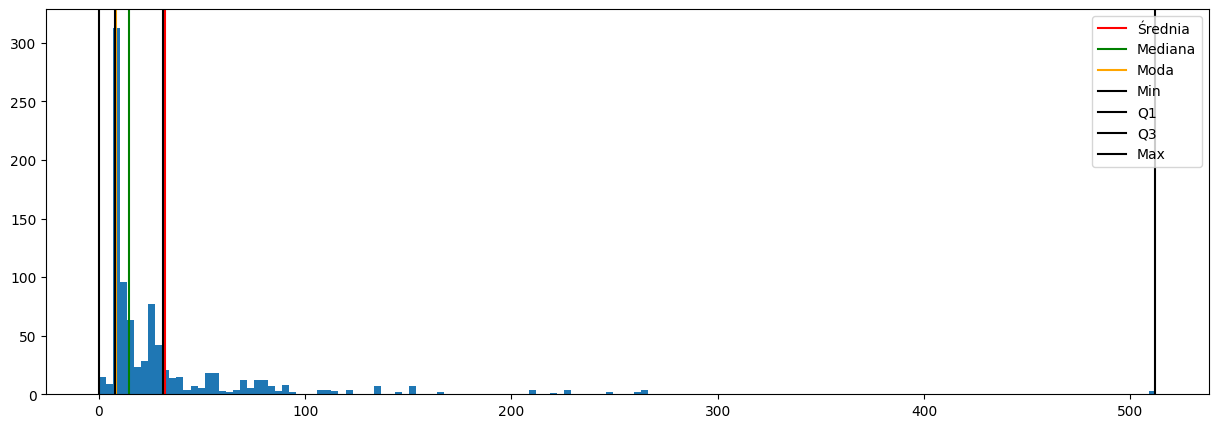

In [13]:
plt.figure(figsize=(15,5))
plt.hist(fare_values, bins=150)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

Zakres

In [14]:
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


Zakres wartości w rozkładzie wynosi 512.3292$.

Rozstęp międzykwartylowy - IQR

In [15]:
iqr = q3 - q1
print(iqr)

23.0


Rozstęp międzykwartylowy wynosi 23$.

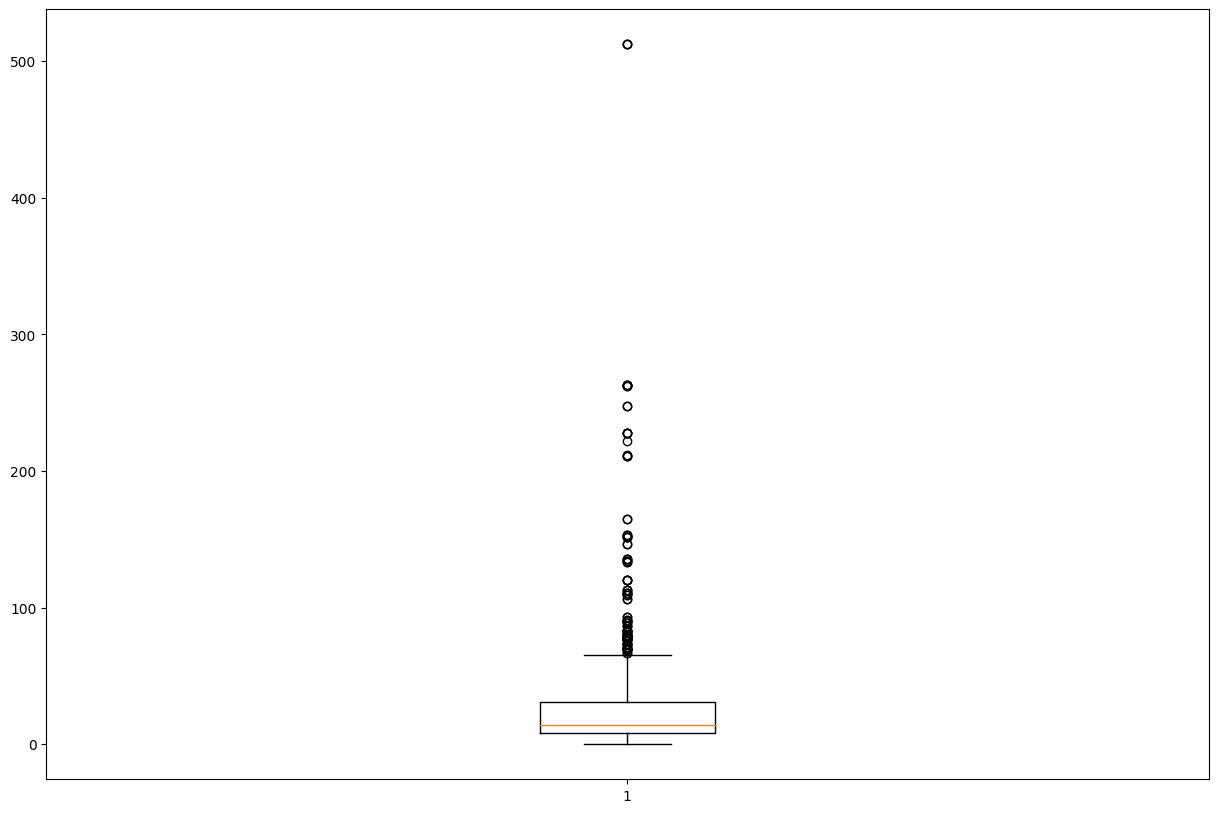

In [16]:
plt.figure(figsize=(15,10))
plt.boxplot(fare_values)
plt.show()

Na powyższym wykresie widać wartości odstające (wartości powyżej 65.5 - q3 + 1.5IQR). Można wywnioskować, że wartości powyżej 65.5 jest relatywnie mało.

Wariancja

In [17]:
variance_fare = round(np.var(fare_values, ddof=1),2)
print(variance_fare)

2469.44


Wariancja wynosi 2469.44.

Odchylenie standardowe

In [18]:
standard_deviation_fare = round(np.std(fare_values, ddof=1),2)
print(standard_deviation_fare)

49.69


Odchylenie standardowe wynosi 49.69.

Asymetria rozkładu

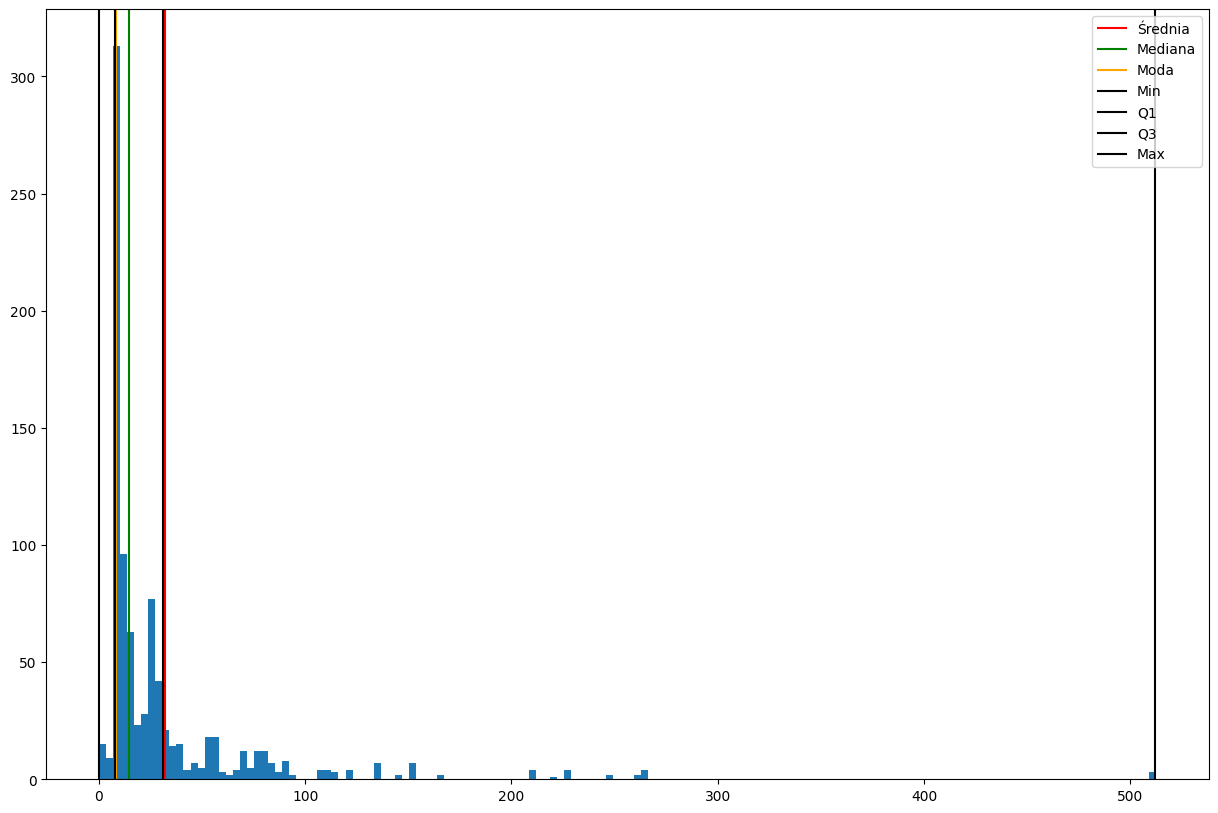

In [19]:
plt.figure(figsize=(15,10))
plt.hist(fare_values, bins=150)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

Rozkład pozytywnie skośny (kolejność wskaźników na wykresie odpowiednio: Moda - Mediana - Średnia) 